In [2]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


### Dataset cleaning

In [3]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols].replace('?', np.nan)
numeric_cars = numeric_cars.astype(float)

numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars = numeric_cars.drop('normalized_losses', 1)
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

numeric_cars.describe()
numeric_cars.isnull().sum()


wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [4]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max() - numeric_cars)/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars

,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.941691,0.586567,0.675214,0.916667,0.588829,0.335714,0.709524,0.875000,0.705607,0.653061,0.777778,0.710526,13495.0
1,0.941691,0.586567,0.675214,0.916667,0.588829,0.335714,0.709524,0.875000,0.705607,0.653061,0.777778,0.710526,16500.0
2,0.769679,0.550746,0.555556,0.616667,0.482157,0.900000,0.333333,0.875000,0.504673,0.653061,0.833333,0.736842,16500.0
3,0.615160,0.470149,0.495726,0.458333,0.670675,0.535714,0.366667,0.812500,0.747664,0.448980,0.694444,0.631579,13950.0
4,0.626822,0.470149,0.478632,0.458333,0.481769,0.535714,0.366667,0.937500,0.686916,0.448980,0.861111,0.842105,17450.0
5,0.615160,0.459701,0.487179,0.558333,0.604732,0.535714,0.366667,0.906250,0.710280,0.448980,0.833333,0.763158,15250.0
6,0.440233,0.229851,0.051282,0.341667,0.474011,0.535714,0.366667,0.906250,0.710280,0.448980,0.833333,0.763158,17710.0
7,0.440233,0.229851,0.051282,0.341667,0.431342,0.535714,0.366667,0.906250,0.710280,0.448980,0.833333,0.763158,18920.0
8,0.440233,0.229851,0.051282,0.325000,0.380140,0.578571,0.366667,0.918750,0.570093,0.448980,0.888889,0.894737,23875.0
10,0.574344,0.467164,0.615385,0.458333,0.648177,0.314286,0.652381,0.887500,0.752336,0.326531,0.722222,0.657895,16430.0


### Univariate k-nearest neighbors

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_uni(train_col_name, target_col_name, df, k_val):
    np.random.seed(1)
    
    #randomize index
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    
    #split into test and train datasets
    split = int(len(df)/2)
    train_set = df.iloc[0:split]
    test_set = df.iloc[split:]
    
    #train the model
    rmse_list = {}
    for k in k_val:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col_name]], train_set[target_col_name])
    
        #predict model
        predict = knn.predict(test_set[[train_col_name]])
    
        #Calculate RMSE
        rmse = mean_squared_error(test_set[target_col_name], predict)**(1/2)
        rmse_list[k] = rmse

    return (rmse_list)

# testing and plotting different feature columns and k values
feature_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
k_val = [1, 3, 5, 7, 9]

def opt_k_value(col, k):
    values = {}
    for n in col:
        predict = knn_uni(n, 'price', numeric_cars, k_val)
        values[n] = predict
    
    return (visual)
 
values = opt_k_value(feature_cols, k_val)
values



    

{'bore': {1: 7496.1492312406444,
  3: 6946.7611789874991,
  5: 6814.81572246008,
  7: 7127.852318537738,
  9: 6871.9598055432007},
 'city_mpg': {1: 4540.3610032247389,
  3: 4666.2121454750277,
  5: 4707.4863593814453,
  7: 4823.8228782197684,
  9: 4878.4230923513387},
 'compression_ratio': {1: 8967.9007212688666,
  3: 7006.418519610942,
  5: 6720.8436266484714,
  7: 7442.4072978131699,
  9: 7212.5824884821768},
 'curb_weight': {1: 5519.7970681237302,
  3: 5048.6077260366692,
  5: 4390.8376872350409,
  7: 4369.3490898512136,
  9: 4632.2055452210743},
 'height': {1: 8965.3212678433101,
  3: 8146.6801384568817,
  5: 7555.7157750452279,
  7: 7819.309069134576,
  9: 7679.8895995460116},
 'highway_mpg': {1: 5270.360471073066,
  3: 4611.8529621806547,
  5: 4583.0065779426222,
  7: 4963.3909810240839,
  9: 5228.4830172601005},
 'horsepower': {1: 3749.5962185254293,
  3: 3967.013584546693,
  5: 4003.6160340520682,
  7: 4389.499217965772,
  9: 4495.4654001467288},
 'length': {1: 5289.10293634819

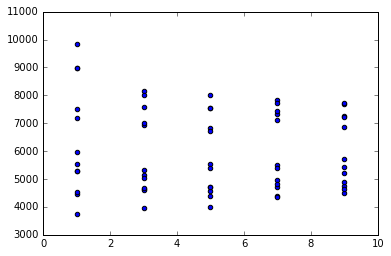

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in visual.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x,y)


### Multivariate k-nearest neighbors

In [51]:
# averaging RMSE values for each column
avg_values = {}
for k,v in values.items():
    avg_val = list(v.values())
    avg_val = np.mean(avg_val)
    avg_values[k] = avg_val

avg_values = pd.Series(avg_values)
avg_values.sort_values()

horsepower           4121.038091
width                4652.631094
city_mpg             4723.261096
curb_weight          4792.159423
highway_mpg          4931.418802
length               5359.061988
wheel_base           5575.721374
bore                 7051.507651
compression_ratio    7470.030531
stroke               7642.158375
peak_rpm             8001.156214
height               8033.383170
dtype: float64

In [25]:
def knn_multi(train_col_names, target_col_names, df, k_val):
    np.random.seed(1)
    
    #randomize index
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    
    #split into test and train datasets
    split = int(len(df)/2)
    train_set = df.iloc[0:split]
    test_set = df.iloc[split:]
    
    #train the model
    knn = KNeighborsRegressor(n_neighbors=k_val)
    knn.fit(train_set[train_col_names], train_set[target_col_names])
    
    #predict model
    predict = knn.predict(test_set[train_col_names])
    
    #Calculate RMSE
    rmse = mean_squared_error(test_set[target_col_names], predict)**(1/2)
    return (rmse)

# Testing on 2 best features from univariate model
two_col = ['width', 'horsepower']
predict_2 = knn_multi(two_col, 'price', numeric_cars, 5)
print (predict_2)

# Testing on 3 best features from univariate model
three_col = ['width', 'horsepower', 'city_mpg']
predict_three = knn_multi(three_col, 'price', numeric_cars, 5)
print (predict_three)

# Testing on 4 best features from univariate model
four_col = ['width', 'horsepower', 'city_mpg', 'curb_weight']
predict_four = knn_multi(four_col, 'price', numeric_cars, 5)
print (predict_four)

# Testing on 5 best features from univariate model
five_col = ['width', 'horsepower', 'city_mpg', 'curb_weight', 'highway_mpg']
predict_five = knn_multi(five_col, 'price', numeric_cars, 5)
print (predict_five)

3564.58801352
3684.00660995
3280.38073116
3339.93137862


#### Optimizing model by modifying hyperparameters

In [71]:
def knn_multi(train_col_names, target_col_names, df):
    np.random.seed(1)
    
    #randomize index
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    
    #split into test and train datasets
    split = int(len(df)/2)
    train_set = df.iloc[0:split]
    test_set = df.iloc[split:]
    
    #train the model
    k_val = [i for i in range(1,26)]
    rmse_list = {}
    for k in k_val:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col_names], train_set[target_col_names])
    
        #predict model
        predict = knn.predict(test_set[train_col_names])
    
        #Calculate RMSE
        rmse = mean_squared_error(test_set[target_col_names], predict)**(1/2)
        rmse_list[k] = rmse

    return (rmse_list)

# Testing on 2 best features from univariate model
k_vals = {}
two_col = ['width', 'horsepower']
predict_two = knn_multi(two_col, 'price', numeric_cars)
k_vals['best_two_features'] = predict_two

# Testing on 4 best features from univariate model
four_col = ['width', 'horsepower', 'city_mpg', 'curb_weight']
predict_four = knn_multi(four_col, 'price', numeric_cars)
k_vals['best_four_features'] = predict_four

# Testing on 5 best features from univariate model
five_col = ['width', 'horsepower', 'city_mpg', 'curb_weight', 'highway_mpg']
predict_five = knn_multi(five_col, 'price', numeric_cars)
k_vals['best_five_features'] = predict_five

k_vals


{'best_five_features': {1: 2551.9730611725695,
  2: 2897.848532331639,
  3: 3180.0368401530313,
  4: 3168.7609635211747,
  5: 3339.9313786156426,
  6: 3537.5205429981911,
  7: 3817.3718358946267,
  8: 4004.8353669685698,
  9: 3992.3186041830318,
  10: 4144.1034680209623,
  11: 4342.0528528290979,
  12: 4416.6607458706185,
  13: 4493.8798141857205,
  14: 4473.6111587459745,
  15: 4474.480783207805,
  16: 4555.1045552100577,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4714.9094279017518,
  21: 4755.8566258237734,
  22: 4787.3804958183637,
  23: 4808.8050657128397,
  24: 4880.3565231312677,
  25: 4923.6795906643601},
 'best_four_features': {1: 2538.6231982266013,
  2: 2811.8660368002761,
  3: 3009.853808093445,
  4: 3127.0172577192884,
  5: 3280.3807311630976,
  6: 3478.8597982492179,
  7: 3781.5612742414464,
  8: 3989.6121845612083,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.8493164711699,
  13: 4464.72650

In [83]:
# finding the optimal k Value for each model
opt_k = {}
for k,v in k_vals.items():
    min_k = list(v.values())
    min_k = np.min(min_k)
    opt_k[k] = min_k

opt_k
    

{'best_five_features': 2551.9730611725695,
 'best_four_features': 2538.6231982266013,
 'best_two_features': 3446.5089224424255}

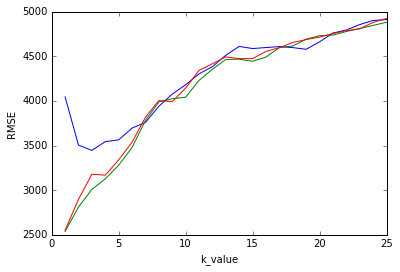

In [88]:
# plotting results
%matplotlib inline

for k,v in k_vals.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')
